In [1]:
import numpy as np;
import pandas as pd;

import matplotlib.pyplot as plt;
import seaborn as sns;

# .Data Collection/Munging: 

In [2]:
credits = pd.read_csv("./credits.csv", error_bad_lines=False);
print("Shape of Data: ",credits.shape);
credits.head(20)

Shape of Data:  (1000, 10)


Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0            0   67    male    2     own             NaN           little   
1            1   22  female    2     own          little         moderate   
2            2   49    male    1     own          little              NaN   
3            3   45    male    2    free          little           little   
4            4   53    male    2    free          little           little   
5            5   35    male    1    free             NaN              NaN   
6            6   53    male    2     own      quite rich              NaN   
7            7   35    male    3    rent          little         moderate   
8            8   61    male    1     own            rich              NaN   
9            9   28    male    3     own          little         moderate   
10          10   25  female    2    rent          little         moderate   
11          11   24  female    2    rent          little           little   
12          12   22  female    2     own          little         moderate   
13          13   60    male    1     own          little           little   
14          14   28  female    2    rent          little           little   
15          15   32  female    1     own        moderate           little   
16          16   53    male    2     own             NaN              NaN   
17          17   25    male    2     own             NaN           little   
18          18   44  female    3    free          little         moderate   
19          19   31    male    2     own      quite rich              NaN   

    Credit amount  Duration              Purpose  
0            1169         6             radio/TV  
1            5951        48             radio/TV  
2            2096        12            education  
3            7882        42  furniture/equipment  
4            4870        24                  car  
5            9055        36            education  
6            2835        24  furniture/equipment  
7            6948        36                  car  
8            3059        12             radio/TV  
9            5234        30                  car  
10           1295        12                  car  
11           4308        48             business  
12           1567        12             radio/TV  
13           1199        24                  car  
14           1403        15                  car  
15           1282        24             radio/TV  
16           2424        24             radio/TV  
17           8072        30             business  
18          12579        24                  car  
19           3430        24             radio/TV

# Data Pre-processing:

## Data Cleaning:

### Handling missing values:

In [3]:
# Checking for missing values in the data.
      # Consider empty string and numpy.inf as missing value.  
pd.options.mode.use_inf_as_na = True;
print("Frequency Table: Missing values per feature count.\n\n", credits.isnull().sum());

# Retrieving data with missing values.
credits_missing = credits.loc[credits.isnull().to_numpy()];

# Remove data with missing values.
# credits.dropna(inplace=True);


Frequency Table: Missing values per feature count.

 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


### Handling duplicate data and drop error-features:

In [4]:
credits.drop(columns=credits.columns[0], inplace=True);

### Handling Imbalanced datasets

Inference: 
 Roughly, most credit is alloted to males than females
-This data is highly unbalanced. In the case of balanced data, variability of estimates decreases. Variability refers to the extend to which a point p in a statistical distribution diverges from the expected value-mean, or amongst other points in the distribution.
- Biased model

 Remedy:  Prior to modelling, use one of the techniques to handle imbalanced datasets.


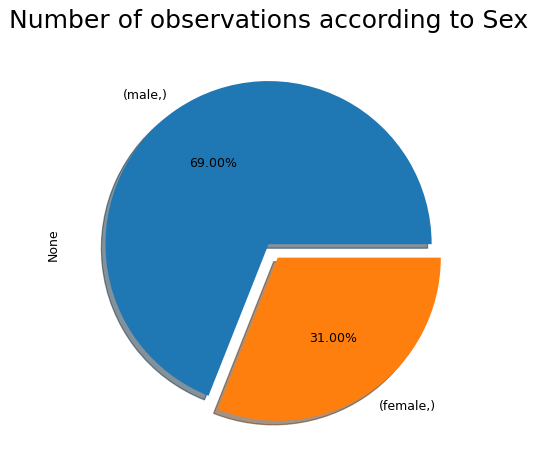

In [5]:
plt.figure(figsize=(17, 6), dpi=90);
plt.title("Number of observations according to Sex", fontdict={'fontsize': 20}, pad=10);
credits.loc[:, ["Sex"]].value_counts().plot(kind="pie", shadow=True, explode=[0, 0.1], autopct="%.2f%%");
print("Inference: \n Roughly, most credit is alloted to males than females");
print("-This data is highly unbalanced. In the case of balanced data, variability of estimates decreases. Variability refers to the extend to which a point p in a sta"+
     "tistical distribution diverges from the expected value-mean, or amongst other points in the distribution.\n- Biased model");
print("\n Remedy:  Prior to modelling, use one of the techniques to handle imbalanced datasets.");

### Outliers Detection

In [6]:
# Methods:
    # Statistical Methods:
        # IQR method(Gaussian data),
        # Using Standard deviation method(Gaussian data),
        # Mahanalobis distance(Multi-dimensional dataset).
        
    # Automatic Outliers Detection:
    

# Data Analysis:

In [7]:
# What kind of people take the most credit by amount ? (male ? female ? age group ?)
# What are the top-usages of this credit ?

# Is there a relationship between the people that take the most credit and 
# the purpose most purpose ?

## Descriptive Analysis: What happened ?

In [8]:
# What kind of people take the most credit by amount ?
# are the top-usages of this credit ?

# Is there a relationship between the people that take the most credit and 
# the most purpose ?
credits

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              Purpose  
0           6             radio/TV  
1          48             radio/TV  
2          12            education  
3          42  furniture/equipment  
4          24                  car  
..        ...                  ...  
995        12  furniture/equipment  
996        30                  car  
997        12             radio/TV  
998        45             radio/TV  
999        45                  car  

[1000 rows x 9 columns]

### What kind of people take the most credit ?

In [9]:
credits["Credit amount"].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

Skewness: 1.828, Kurtosis: 3.54603 
This feature is highly positively skewed and also very flat, 
 it's likely non-Gaussian. I'd rather use the median to express central tendency.


<ipython-input-10-6c44e9e7a298>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, 3);


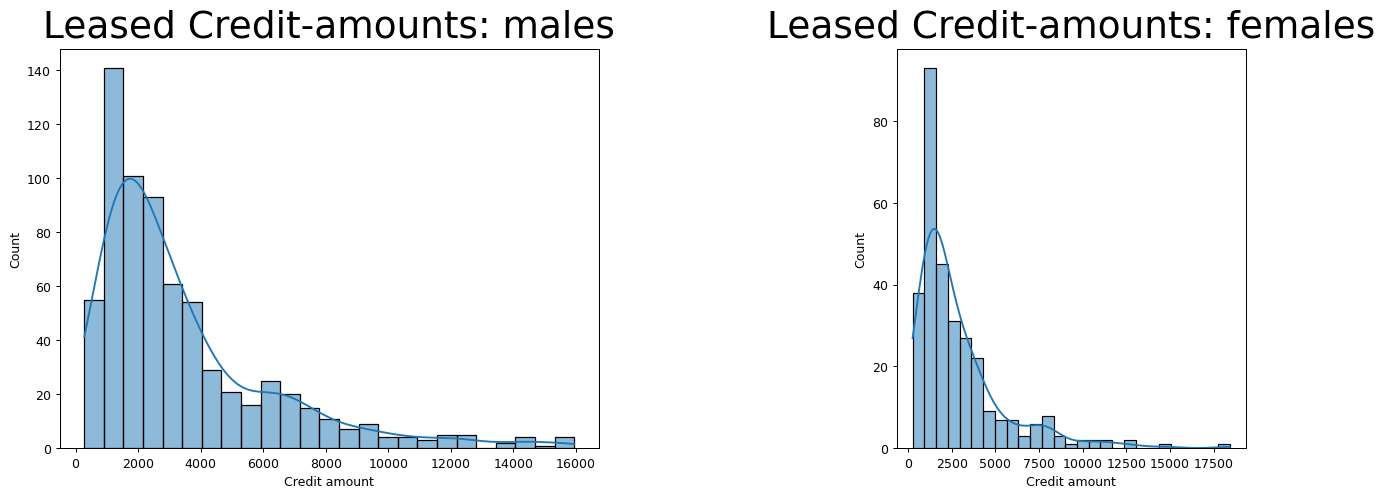

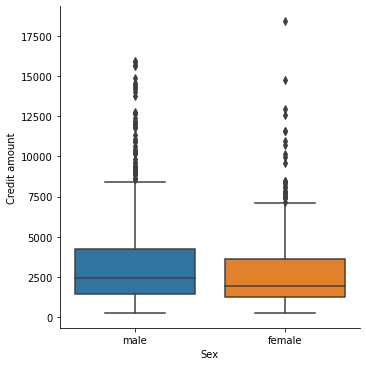

In [10]:
# In order for me to determine the best measure of central tendency to use in the
# pivot table, i'll rather investigate the normal-like nature of the data
# by interpreting the Skweness and Kurtosis of the distribution-"Credit amount".


skewness = credits.loc[credits["Sex"] == 'male']["Credit amount"].skew();
kurtosis = credits.loc[credits["Sex"] == 'male']["Credit amount"].kurtosis();


plt.figure(figsize=(17, 20), dpi=90);
plt.subplot(3, 2, 1);
plt.title('Leased Credit-amounts: males', pad=10, fontdict={'fontsize': 30});
sns.histplot(data=credits.loc[credits["Sex"] == 'male']["Credit amount"], kde=True, );

plt.subplot(3, 3, 3);
plt.title('Leased Credit-amounts: females', pad=10, fontdict={'fontsize': 30});
sns.histplot(data=credits.loc[credits["Sex"] == 'female']["Credit amount"], kde=True, );
print('Skewness: {0:.4g}, Kurtosis: {1:.5f} \n'.format(skewness, kurtosis)+"This feature is highly positively skewed and also very flat, \n it's likely non-Gaussian. I'd rather use the median to express central tendency.")

plt.subplot(3, 3, 3);
sns.catplot(x="Sex", y="Credit amount", kind="box", estimator=np.mean, data=credits);

In [11]:
# Using the median as measure of central tendency
pivot_on_sex_housing = credits.pivot_table(index="Sex", columns='Housing', values='Credit amount', aggfunc=np.median);
pivot_on_sex_housing

Housing    free     own    rent
Sex                            
female   3757.0  1812.5  2124.0
male     3844.0  2346.0  2414.5

Inference: Males with Free Housing often get the most Credits amount as compared to females.


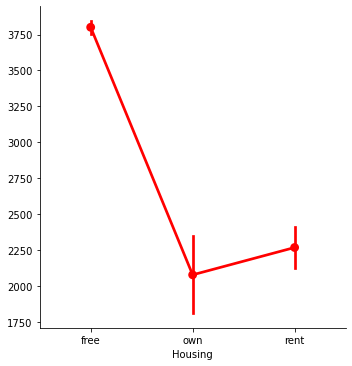

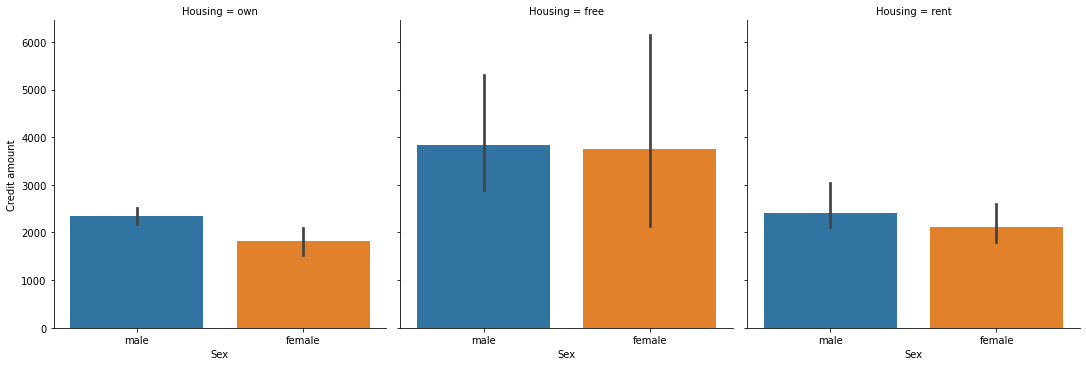

In [12]:
# First one you are comparing categories so use a bar plot 
sns.catplot(data=pivot_on_sex_housing, kind="point", estimator=np.median, ci='sd', color="red");
print("Inference: Males with Free Housing often get the most Credits amount as compared to females.");


# Here we compare distributions for a given(Housing : Free) category.
sns.catplot(x="Sex", y="Credit amount", col="Housing", kind="bar", data=credits, estimator=np.median);


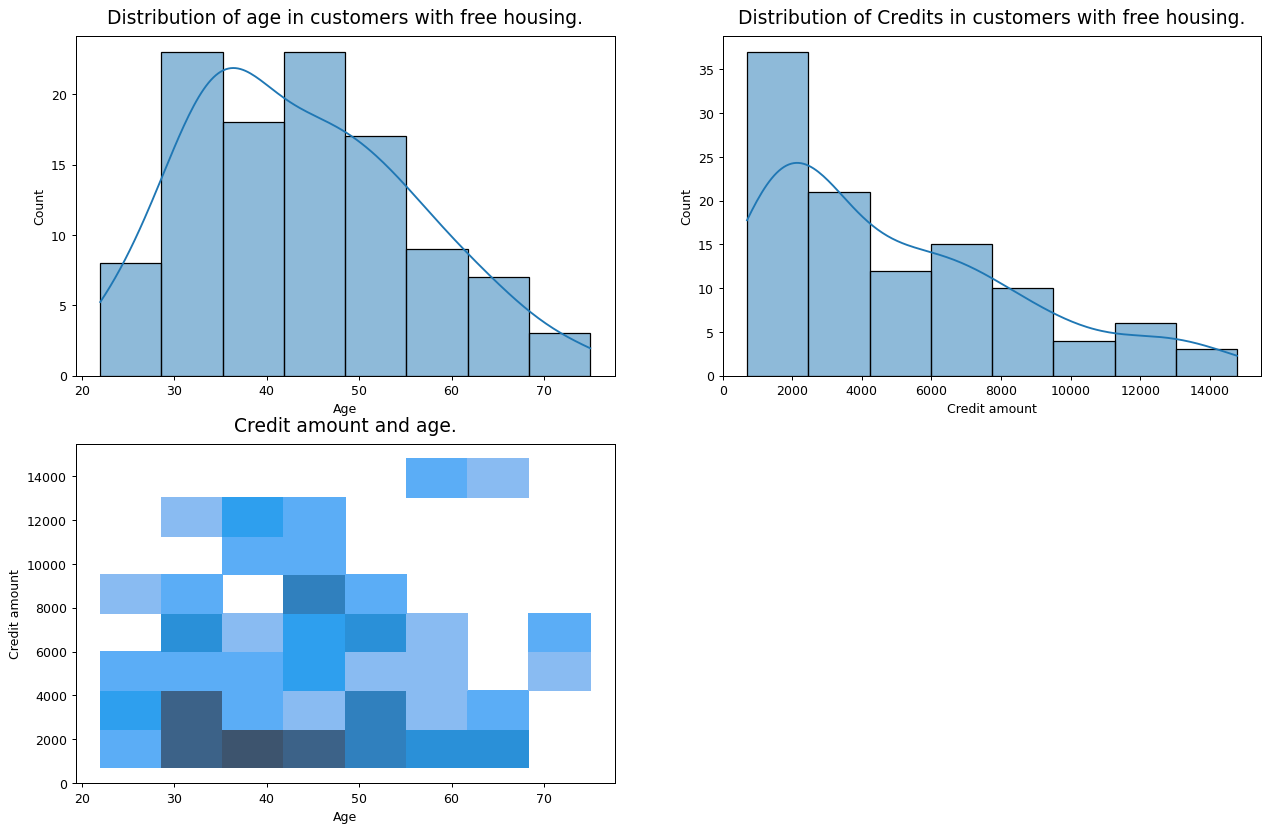

In [35]:
# Here we investigate the distribution of age for a given category: People of what age group usually have free Housing
plt.figure(figsize=(17, 17), dpi=90);
free_housing = credits.loc[credits['Housing'] == 'free'];


plt.subplot(3, 2, 1);
plt.title("Distribution of age in customers with free housing.", fontdict={'fontsize': 15}, pad=10);
sns.histplot(x="Age", data=free_housing, kde=True, );



plt.subplot(3, 2, 2);
plt.title("Distribution of Credits in customers with free housing.", fontdict={'fontsize': 15}, pad=10);
sns.histplot(x="Credit amount", data=free_housing, kde=True, );

plt.subplot(3, 2, 3);
plt.title("Credit amount and age.", fontdict={'fontsize': 15}, pad=10);
sns.histplot(x='Age', y='Credit amount', data=free_housing, common_norm=False);

### What kind of purpose do they use this credit for ?

In [14]:
most_credit_people = free_housing.loc[free_housing["Age"]>=29]
most_credit_people = most_credit_people.loc[most_credit_people["Age"]<=56];

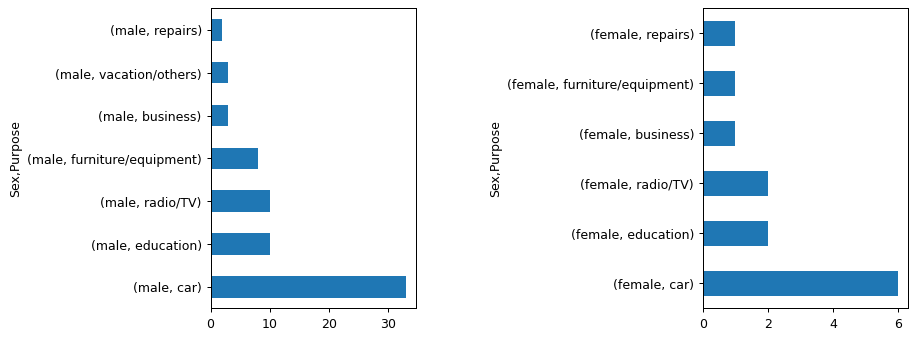

In [16]:
# Analysing the most common usage
plt.figure(figsize=(10, 15), dpi=90);
most_purpose = most_credit_people.value_counts(sort=True, subset=["Sex", "Purpose"]);

plt.subplot(3, 3, 1);
most_purpose.groupby("Sex").get_group('male').plot(kind='barh');
plt.subplot(3, 3, 3);
most_purpose.groupby("Sex").get_group('female').plot(kind='barh');

## Diagnostic Analysis: Why did it happen ?

In [102]:
# Understand why those who take little amounts do take little amounts.
little = credits.loc[credits['Credit amount'] < 1000];
little.describe()

Age         Job  Credit amount    Duration
count  116.000000  116.000000     116.000000  116.000000
mean    35.086207    1.543103     723.534483   11.508621
std     12.134442    0.595523     185.661002    5.103274
min     19.000000    0.000000     250.000000    4.000000
25%     25.000000    1.000000     628.250000    7.000000
50%     32.000000    2.000000     730.500000   12.000000
75%     41.000000    2.000000     886.500000   12.000000
max     66.000000    3.000000     999.000000   36.000000

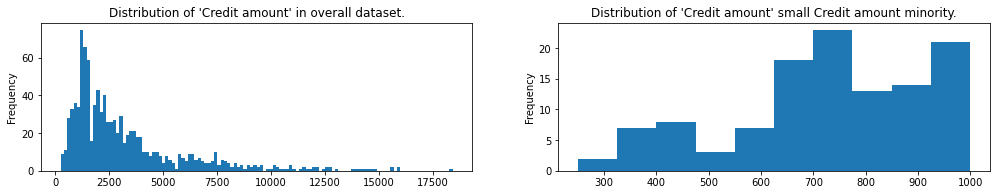

In [103]:
plt.figure(figsize=(17, 6));
plt.subplot(2, 2, 1);
plt.title("Distribution of \'Credit amount\' in overall dataset.");
credits['Credit amount'].plot(kind='hist', bins=120);

plt.subplot(2, 2, 2);
plt.title("Distribution of \'Credit amount\' small Credit amount minority.");
little['Credit amount'].plot(kind='hist');

In [129]:
# Scale down credit amount to draw out correlation matrix
new_little = little;
cc = little;
c = new_little['Credit amount'].apply(func=np.log10); # Data mining

In [105]:
cc = new_little.drop(['Credit amount'], axis=1)

In [108]:
cc['Credit amount'] = c.to_numpy();
cc

Age     Sex  Job Housing Saving accounts Checking account  Duration  \
26    39    male    1     own          little              NaN         6   
27    42  female    2    rent            rich             rich        12   
39    24    male    2     own          little         moderate         9   
55    26    male    1     own             NaN              NaN         6   
71    46    male    1    rent             NaN              NaN         7   
..   ...     ...  ...     ...             ...              ...       ...   
936   28  female    1     own          little             rich         9   
942   31    male    2     own             NaN              NaN        24   
964   22    male    1     own          little         moderate         6   
976   64  female    2     own          little         moderate         6   
997   38    male    2     own          little              NaN        12   

                 Purpose  Credit amount  
26              radio/TV       2.629410  
27              radio/TV       2.611723  
39              radio/TV       2.660865  
55                   car       2.893762  
71              radio/TV       2.863323  
..                   ...            ...  
936             radio/TV       2.872156  
942  furniture/equipment       2.968016  
964              repairs       2.657056  
976             radio/TV       2.876795  
997             radio/TV       2.905256  

[116 rows x 9 columns]

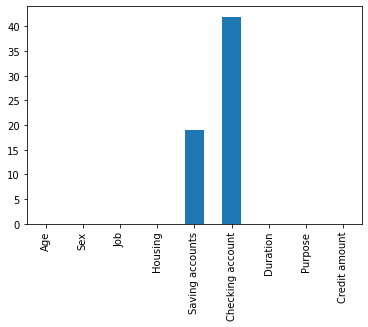

In [123]:
cc.isna().sum().plot(kind="bar");

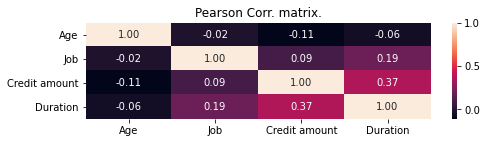

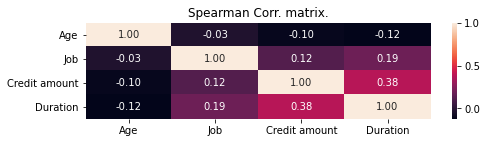

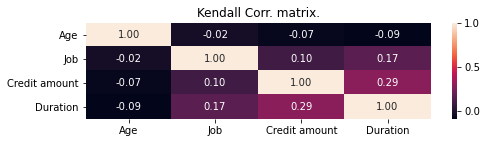

In [130]:
plt.figure(figsize=(17, 6));
plt.subplot(3, 2, 1);
plt.title("Pearson Corr. matrix.")
sns.heatmap(cc.corr(), annot=True, fmt=".2f");

plt.figure(figsize=(17, 6));
plt.subplot(3, 2, 2);
plt.title("Spearman Corr. matrix.")
sns.heatmap(cc.corr(method="spearman"), annot=True, fmt=".2f");

plt.figure(figsize=(17, 6));
plt.subplot(3, 2, 3);
plt.title("Kendall Corr. matrix.")
sns.heatmap(cc.corr(method="kendall"), annot=True, fmt=".2f");

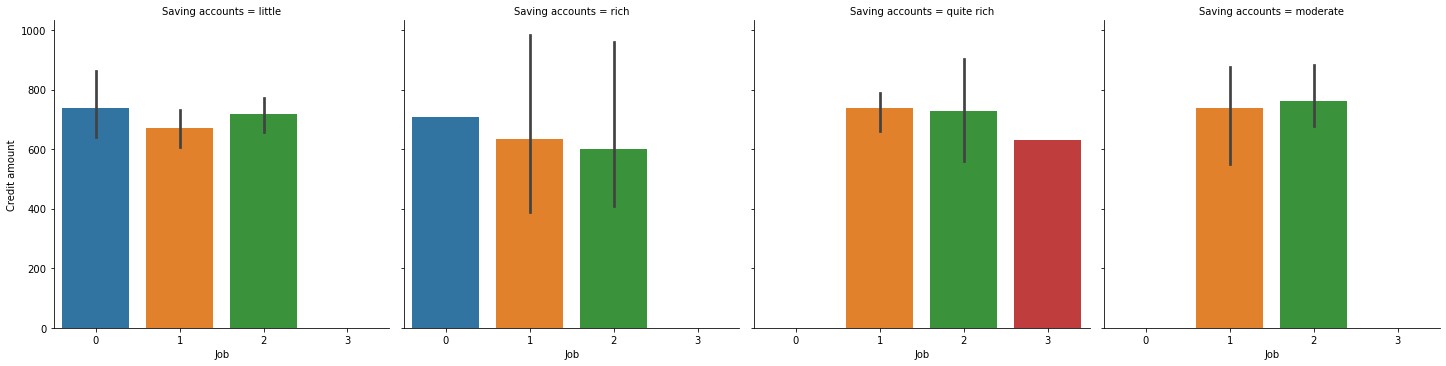

In [133]:
sns.catplot(x='Job', y="Credit amount", col='Saving accounts', data=cc, kind='bar');